# Lab01: Assignment
In this assignment you're required to find whether the given numbers are prime or not using sequential and parallel processing and then compare the performance of both

## 1. Sequential processing

Bonus points will be given if you show/print the name of the process that did calculation for given number (use current_process() from multiprocessing module) 

In [1]:
import time

In [2]:
numbers = [15492781, 15492787, 15492803, 
           15492811, 15492810, 15492833, 
           15492859, 15502547, 15520301, 15527509]

In [3]:
def is_prime(number):
    """returns True if number 
    is prime, False otherwise"""
    # your code here
    for i in range(2,number):
      if number % i == 0:
        return False
    return True

    
if __name__ == "__main__":
    # your code here
    # 1. record the start time using time() function of time module     
    start = time.time()
    
    for number in numbers:
        # 2. print the number and 
        #    whether it is prime or not.
        #    use is_prime() function
        verdict = "NOT PRIME"
        if is_prime(number):
          verdict = "PRIME"
        print(f"{number} {verdict}")
    
    # 3. record the performance and print out
    t_seq = time.time() - start
    print(t_seq)

15492781 PRIME
15492787 PRIME
15492803 PRIME
15492811 PRIME
15492810 NOT PRIME
15492833 PRIME
15492859 PRIME
15502547 PRIME
15520301 PRIME
15527509 PRIME
7.623140335083008


## 2. Parallel processing

In [8]:
from multiprocessing import Process, Queue, current_process
from queue import Empty # exception to break from loop when the get(block=False) called on empty queue 

In [10]:
def check_prime_worker(job_queue):
    """worker function passed as target to Process"""
    while True:
        # your code here
        # 1. get next available number from queue
        # 2. print the number and whether it
        #    is prime or not, use is_prime()
        # 3. use try/except to catch Empty exception 
        #    and quit the loop if no number remains in queue
        try:
          number = job_queue.get(block=False)
          verdict = "NOT PRIME"
          if is_prime(number):
            verdict = "PRIME"
          print(f"{number} {verdict} (from {current_process().name})")
        except Empty:
          return

        
# calculate if the numbers are prime or not
# measure the performance of parallel processing
if __name__ == "__main__":
    job_queue = Queue()
    
    t_par = []
    # number of workers 
    for i in range(1, len(numbers)+1):
        # preparing the jobs to be done by workers
        for n in numbers:
            job_queue.put(n)

        # your code here

        # 1. create list of processes of N process. Choose N in range of [1:len(numbers)]
        N = i
        processes = []
        for _ in range(N):
          processes.append(Process(target=check_prime_worker, args=(job_queue,)))

        # 2. record the start time 
        start = time.time()
        
        # 3. start each of the processes
        for process in processes:
          process.start()

        # 4. call join on each of the processes
        for process in processes:
          process.join()
        # 5. measure the performance and append to the list of records
        # t_par.append( )
        t_par.append(time.time() - start)

        
        # 6. close the processes
print(t_par)


15492781 PRIME (from process Process-111)
15492787 PRIME (from process Process-111)
15492803 PRIME (from process Process-111)
15492811 PRIME (from process Process-111)
15492810 NOT PRIME (from process Process-111)
15492833 PRIME (from process Process-111)
15492859 PRIME (from process Process-111)
15502547 PRIME (from process Process-111)
15520301 PRIME (from process Process-111)
15527509 PRIME (from process Process-111)
15492787 PRIME (from process Process-113)
15492781 PRIME (from process Process-112)
15492803 PRIME (from process Process-113)
15492810 NOT PRIME (from process Process-113)
15492811 PRIME (from process Process-112)
15492833 PRIME (from process Process-113)
15492859 PRIME (from process Process-112)
15502547 PRIME (from process Process-113)
15520301 PRIME (from process Process-112)
15527509 PRIME (from process Process-113)
15492781 PRIME (from process Process-114)
15492787 PRIME (from process Process-115)
15492810 NOT PRIME (from process Process-115)15492803 PRIME (from pr

## 3. Compare the performance of Sequential processing against Parallel processing 
Draw a simple 2D graph using matplotlib:
- X axis should be number of processes from part 2, i.e., it should have values: 1, 2, 3,.., len(numbers)
- Y axis should be ratio of "time for sequential processing" (t_seq) to a "time for parallel processing" (t_par[i-1]) when i processes are used.

Explain the results in a few sentences and what factors can affect it?

In [11]:
!pip install matplotlib

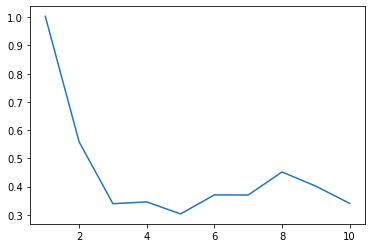

In [12]:
import matplotlib.pyplot as plt

plt.plot([i+1 for i in range(len(numbers))], [i/t_seq for i in t_par])
plt.show()

### The factors affecting performance

The above results can be affected by the number of available CPU cores, the overhead from context-switching between processes, as well as the number of prime numbers to be processed. 

When using more processes, we get a better performance as long as we are using multiple CPU cores. But once the number of processes exceeds the number of CPU cores, we would have processes being switched on the same core, which needs extra overhead and therefore reduces performance (compared to having one process per CPU core). Having more processes than prime numbers would also reduce performance as some processes would just get started and do nothing.